# sequana_coverage test case example (Virus) 

This notebook creates the BED file provided in 
- https://github.com/sequana/resources/tree/master/coverage and
- https://www.synapse.org/#!Synapse:syn10638358/wiki/465309

**WARNING**: you need an account on synapse to get the FastQ files.

First, downloads 1 FastQ from Synapse, its reference genome and its genbank annotation. Then, it performs the mapping using BWA to get a BAM file. The BAM file is converted to a BED, which is going to be one input file to our analysis. Finally, we use the coverage tool from Sequana project (i) with the standalone (sequana_coverage) and (ii) the Python library to analyse the BED file.

Versions used:
- sequana 0.5.0
- bwa mem 0.7.15
- bedtools 2.26.0
- samtools 1.5
- synapseclient 1.7.2

In [16]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = [10,7]

Populating the interactive namespace from numpy and matplotlib


# Download the genbank and genome reference

### Method1: use sequana_coverage to download from ENA website

http://www.ebi.ac.uk/ena/data/view/JB409847

In [ ]:
!sequana_coverage --download-reference JB409847 --download-genbank JB409847

### Method 2: synapse client (you need a synapse login)


In [5]:
import synapseclient
l = synapseclient.login()
_ = l.get("syn10638368", downloadLocation=".", ifcollision="overwrite.local")
_ = l.get("syn10638369", downloadLocation=".", ifcollision="overwrite.local")

Welcome, Thomas Cokelaer!



# Download the FastQ

In [15]:
_ = l.get("syn10638367", downloadLocation=".", ifcollision="overwrite.local")

# Map the reads

In [8]:
!sequana_mapping --file1 JB409847_R1_clean.fastq.gz --reference JB409847.fa

Theoretical Depth of Coverage : 975.9444304117201
[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.00 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.00 sec
[main] Version: 0.7.15-r1140
[main] CMD: bwa index JB409847.fa
[main] Real time: 0.081 sec; CPU: 0.008 sec
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 62064 sequences (19318820 bp)...
[M::mem_process_seqs] Processed 62064 reads in 4.032 CPU sec, 1.022 real sec
[main] Version: 0.7.15-r1140
[main] CMD: bwa mem -t 4 -R @RG\tID:1\tSM:1\tPL:illumina -T 30 JB409847.fa JB409847_R1_clean.fastq.gz
[main] Real time: 5.213 sec; CPU: 4.472 sec


## Convert the BAM to BED 

In [9]:
!bedtools genomecov -d -ibam JB409847.fa.sorted.bam> JB409847.bed

## Filter the BAM file to get a 2-columns BED file

In [10]:
! samtools view -q 35 -o JB409847.filtered.bam JB409847.fa.sorted.bam
! samtools depth -d 20000 JB409847.fa.sorted.bam JB409847.filtered.bam -aa > JB409847.filtered.bed

In [11]:
from sequana import GenomeCov
b = GenomeCov("JB409847.filtered.bed", "JB409847.gbk")
chromosome = b.chr_list[0]
chromosome.running_median(4001, circular=True)
chromosome.compute_zscore()

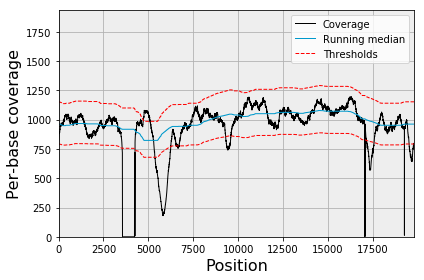

In [14]:
chromosome.plot_coverage()